In [1]:
import mxnet as mx 
from importlib import import_module
import cv2
import matplotlib.pyplot as plt 
import numpy as np 

ImportError: No module named 'mxnet'

<mxnet.io.MXDataIter object at 0x7f258fceaeb8> <mxnet.io.MXDataIter object at 0x7f258fcf0048>
image size <mxnet.io.MXDataIter object at 0x7f258fceaeb8>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


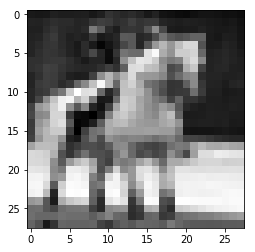

In [2]:
# 1. data reading
# labels in order: 
"""
0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck
"""

def get_cifar10():
    # TODO fill all the blanks 
    # Hint
    # rgb mean default: '123.68,116.779,103.939',   because we need to normalize the data 
    # pad size: whatever you think is valid, pad to 32 is good 
    # image shape:  the image shape feed into the network, e.g. (3,224,224)')
    # num-classes: the number of classes
    # num-examples:  the number of training examples, 50000 :)
    # data-nthreads: default=4,number of threads for data decoding, how many cpus do you have
    # dtype: default is float32, can be data type: float32 or float16')
    train = mx.io.ImageRecordIter(
            path_imgrec         = './cifar10_train.rec',
            label_width         = 1,
            mean_r              = 123.68,
            mean_g              = 116.779,
            mean_b              = 103.939,
            data_name           = 'data',
            label_name          = 'softmax_label',
            data_shape          = (3,28,28),
            batch_size          = 128,
            pad                 = 0,  
            fill_value          = 127, # default 255
            preprocess_threads  = 8,  # how many threads are used for pre_process
            shuffle             = True)
    val = mx.io.ImageRecordIter(
            path_imgrec         = './cifar10_val.rec',
            label_width         = 1,
            mean_r              = 123.68,
            mean_g              = 116.779,
            mean_b              = 103.939,
            data_name           = 'data',
            label_name          = 'softmax_label',
            data_shape          = (3, 28, 28),
            batch_size          = 128,
            pad                 = 0,
            fill_value          = 127,
            preprocess_threads  = 8,
            shuffle             = False)   #for training 
    return train, val

train, val = get_cifar10()
# TODO write the script to look what is inside train and val
# Check the image size, and label 
# Display the image 
# Question? check MXNET_course/mxnet-week3/cifar10/step_by_step_debug.ipynb
print (train, val)
print('image size {}'.format(train))

i = 0

# read first image
batch_numpy = train.next().data[0].asnumpy()
label_numpy = train.next().label[0].asnumpy()
print (type(batch_numpy))
print (type(label_numpy))

#show img
randidx = np.random.randint(0,128)
img = batch_numpy[randidx]
img = np.squeeze(img).sum(axis=0)
plt.imshow(img, cmap='gray')
plt.show()

In [9]:
# 2 model getting 
# TODO read through resnet.py file for understanding
def get_resnet():
    net = import_module('resnet')
    sym = net.get_symbol(10,20,"3,28,28")
    return sym 
sym = get_resnet()

# TODO 
# 1. Plot and visualize the network. Put your comments about its architecture (why bottlenet)
# 2. List all weight and output (Question? check MXNET_course/mxnet-week3/cifar10/step_by_step_debug.ipynb)
# Hint: check mx.viz.plot

# visualize the network
plot = mx.viz.plot_network(sym, title="model_network", save_format='pdf', hide_weights=True)
plot.render("Model_Network")
# list all weight and output
arg_name = sym.list_arguments()
out_name = sym.list_outputs()
print (arg_name)
print (out_name)

['data', 'bn_data_gamma', 'bn_data_beta', 'conv0_weight', 'stage1_unit1_bn1_gamma', 'stage1_unit1_bn1_beta', 'stage1_unit1_conv1_weight', 'stage1_unit1_bn2_gamma', 'stage1_unit1_bn2_beta', 'stage1_unit1_conv2_weight', 'stage1_unit1_sc_weight', 'stage1_unit2_bn1_gamma', 'stage1_unit2_bn1_beta', 'stage1_unit2_conv1_weight', 'stage1_unit2_bn2_gamma', 'stage1_unit2_bn2_beta', 'stage1_unit2_conv2_weight', 'stage1_unit3_bn1_gamma', 'stage1_unit3_bn1_beta', 'stage1_unit3_conv1_weight', 'stage1_unit3_bn2_gamma', 'stage1_unit3_bn2_beta', 'stage1_unit3_conv2_weight', 'stage2_unit1_bn1_gamma', 'stage2_unit1_bn1_beta', 'stage2_unit1_conv1_weight', 'stage2_unit1_bn2_gamma', 'stage2_unit1_bn2_beta', 'stage2_unit1_conv2_weight', 'stage2_unit1_sc_weight', 'stage2_unit2_bn1_gamma', 'stage2_unit2_bn1_beta', 'stage2_unit2_conv1_weight', 'stage2_unit2_bn2_gamma', 'stage2_unit2_bn2_beta', 'stage2_unit2_conv2_weight', 'stage2_unit3_bn1_gamma', 'stage2_unit3_bn1_beta', 'stage2_unit3_conv1_weight', 'stage2_un

In [18]:
# 3 sanity check random image inference
img1 = cv2.imread("frog.jpg")
print(img1.shape)
img1 = cv2.resize(img1,(32,32))# you need to pad it if you do padding for you nework
plt.imshow(img1)
plt.show()
print( type(img1))
img1 = img1.transpose((2,0,1)).reshape((1,3,28,28))
print (img1.shape)

img2 = cv2.imread("frog2.jpg")
img2 = cv2.resize(img2,(28,28))# you need to pad it if you do padding for you nework
plt.imshow(img2)
plt.show()
print (type(img2))
img2 = img2.transpose((2,0,1)).reshape((1,3,28,28))
print (img2.shape)

img = np.vstack([img1,img2])
print ("The very small training dataset contain: ", img.shape)

# TODO: figure out how to convert numpy array to mx.nd.array
img_mxnd = mx.nd.array(img, ctx=mx.gpu()) 
label_mxnd = mx.nd.array(6, ctx=gpu()) # 6 is frog, give 6 as label
img_itr = mx.io.NDArrayIter(data=img_mxnd, data_name='data', 
                            label_name='softmax_label', label=label_mxnd, 
                            batch_size=sizeof(data)) # ??? Hint the name should "data" and softmax_label
print( "small dataset is: ", type(img_itr))
for each in img_itr:
    print( each)

# TODO bind the random img to network 
# question? check mxnet-week3/cifar10/train_cifar10.py
mod = mx.mod.Module(context=[mx.gpu()],
                   symbol=sym,
                   data_names=['data'],
                   label_names=['softmax_label']) 
mod.bind(train.provide_data, train.provide_label)
mod.init_params(mx.init.Xavier(magnitude=2.0)) 

# run forward perdiction 
# TODO fill the mod.predict 
# check mod.predict
out = mod.predict(eval_data=img_itr)
print (out.asnumpy())

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
print np.argmax(out.asnumpy(),axis=1)

In [ ]:
# 4 overfit small dataset 
# TODO fill all ???
mod.init_optimizer('sgd', optimizer_params=(('learning_rate', .1), )) 
# run forward perdiction
metric = mx.metric.create('acc')

for epoch in range(5):
    img_itr.reset()
    metric.reset()
    for batch in img_itr:
        mod.forward(batch, is_train=True)
        mod.update_metric(metric, batch.label)
        mod.backward()
        mod.update()
    print ('Epoch {}, Train {}'.format(epoch, metric.get()))
    # You should get 100% accuacy on these two images


In [ ]:
#5 (optional) train cifar10 on resnet(~epoch) if you have GPU. Build the training script from week2
mod_cifar = mx.mod.Module(context=[mx.gpu(0)],
                         symbol=sym,
                         data_names=['data'],
                         label_names=['label'])
train.reset()
val.reset()
mod_cifar.fit(train_data=train,
              eval_data=val,
              num_epoch=16,
              optimizer=, 
              optimizer_params={???}, 
              epoch_end_callback=mx.callback.do_checkpoint('resnet_cifar_10'),
              initializer=mx.init.Xavier(rnd_type='gaussian', factor_type='in',magnitude=2),
              batch_end_callback=[mx.callback.Speedometer(128, 1)], 
              eval_metric=['acc','ce'])

In [ ]:
# 6 (optional) Wild test on your model 